# Script for interactive plotting of Az and Co plots. 

First things first we want to import our raw data from our data source. 

In [7]:
import os

os.chdir('C:\\Users\\matt.slevin\\Documents\\antenna_data_processing_system')

print( os.getcwd() )

C:\Users\matt.slevin\Documents\antenna_data_processing_system


Import all the custom functions that we use. 

In [8]:
from file_merge import * 
from formula import *
from antenna_plots import *
from generate_data import *
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

P1
AZ T0 CO
AZ T0 CR
EL T0 CO
EL T1 CO
Starting P1....
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
search_range_is:20
Finished P1
o.O.o


Read in all the data

In [9]:
all_ports=read_in_data_all_ports(    sub_dir = "\\raw_data_2\\"     )

print("o.O.o")

P1
EL T0 CO
EL T10 CO
EL T5 CO
AZ T0 CO
AZ T0 CR
P2
AZ T0 CO
AZ T0 CR
EL T0 CO
EL T10 CO
EL T5 CO
P3
AZ T0 CR
EL T0 CO
EL T10 CO
EL T5 CO
AZ T0 CO
P4
AZ T0 CO
AZ T0 CR
EL T0 CO
EL T10 CO
EL T5 CO
o.O.o


Isolate our Elevation panda so that we can plot it. 

In [6]:
az_co= all_ports["P1"]["AZ T0 CO"]["amplitude"]
az_cr= all_ports["P1"]["AZ T0 CR"]["amplitude"]

az_co = az_co.convert_objects(convert_numeric=True)
az_cr = az_cr.convert_objects(convert_numeric=True)

Import all the plotting libaries

In [4]:

import mpld3
from mpld3 import plugins
from mpld3.utils import get_id
import numpy as np
import collections
import matplotlib.pyplot as plt


Plot the code. With an interactive plot. 

In [29]:
#normalise 
normalised_az_co,normalised_az_cr = normalise2(az_co,az_cr)

#Get Freq list of column headers
headers_az_co = list(az_co.dtypes.index)
headers_az_cr = list(az_cr.dtypes.index)

#Create plot
#fig, ax = plt.subplots(figsize=(12,7))

labels = headers_az_cr

#normalised_az = pd.concat([normalised_az_cr,], axis = 1)
fig = plt.figure(figsize=(12,16))
fig.subplots_adjust(right=.8)
ax1 = fig.add_subplot(2,1,2)
ax2 = fig.add_subplot(2,1,1)

s1 = ax2.plot(normalised_az_co, lw=1.5, alpha=0.9)
s2 = ax1.plot(normalised_az_cr, lw=1.5, alpha=0.9)


"""
interactive_legend = plugins.InteractiveLegendPlugin(line_collections, labels, alpha_unsel=0.1, alpha_over=1.5, start_visible=False)
plugins.connect(fig, interactive_legend)
"""

plugins.connect(fig, plugins.InteractiveLegendPlugin(s1, labels, ax=ax1))
plugins.connect(fig, plugins.InteractiveLegendPlugin(s2, labels, ax=ax2))
"""
s1=ax2.plot(x, y.T, lw=4, alpha=0.1)
    
plugins.connect(fig, plugins.InteractiveLegendPlugin(l1, labels, ax=ax1))
"""

#################################################################################################
# Figure Settings

#Set axis parameters
ax.grid(alpha=0.25)
ax.set_ylim([-40,0.5])
ax.set_xlim([0,360])
x_tick_spacing = 20
y_tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_tick_spacing))


#Set Plot title & axis titles
ax.set_title('P2 Azimuth')

ax.set_ylabel('dBi')
ax.set_xlabel('Angle')

ax.set_ylim([-40,0.5])
ax.set_xlim([0,360])


mpld3.display()

New test Script to see if we can pair to waves together for one toggel. 

In [ ]:
#normalise 
normalised_az_co,normalised_az_cr = normalise2(az_co,az_cr)

#Get Freq list of column headers
headers_az_co = list(az_co.dtypes.index)
headers_az_cr = list(az_cr.dtypes.index)

#Create plot
#fig, ax = plt.subplots(figsize=(12,7))

labels = headers_az_cr

#normalised_az = pd.concat([normalised_az_cr,], axis = 1)
fig = plt.figure(figsize=(12,16))
fig.subplots_adjust(right=.8)
ax1 = fig.add_subplot(2,1,2)
ax2 = fig.add_subplot(2,1,1)

s1 = ax2.plot(normalised_az_co, lw=1.5, alpha=0.9)
s2 = ax1.plot(normalised_az_cr, lw=1.5, alpha=0.9)


"""
interactive_legend = plugins.InteractiveLegendPlugin(line_collections, labels, alpha_unsel=0.1, alpha_over=1.5, start_visible=False)
plugins.connect(fig, interactive_legend)
"""

plugins.connect(fig, plugins.InteractiveLegendPlugin(s1, labels, ax=ax1))
plugins.connect(fig, plugins.InteractiveLegendPlugin(s2, labels, ax=ax2))
"""
s1=ax2.plot(x, y.T, lw=4, alpha=0.1)
    
plugins.connect(fig, plugins.InteractiveLegendPlugin(l1, labels, ax=ax1))
"""

mpld3.display()

In [1]:
#normalise 
normalised_az_co,normalised_az_cr = normalise2(az_co,az_cr)
normalised_az = normalise2(az_co,az_cr)

#Get Freq list of column headers
headers_az_co = list(az_co.dtypes.index)
headers_az_cr = list(az_cr.dtypes.index)

#Create plot
#fig, ax = plt.subplots(figsize=(12,7))

labels = headers_az_cr

#normalised_az = pd.concat([normalised_az_cr,], axis = 1)
fig,ax1 = plt.subplots(figsize=(12,16))
fig.subplots_adjust(right=.8)


s2 = ax1.plot(np.arange(0,360,1),normalised_az_co, lw=1.5, alpha=0.9)


"""
interactive_legend = plugins.InteractiveLegendPlugin(line_collections, labels, alpha_unsel=0.1, alpha_over=1.5, start_visible=False)
plugins.connect(fig, interactive_legend)
"""

plugins.connect(fig, plugins.InteractiveLegendPlugin(s2, labels, ax=ax1))

"""
s1=ax2.plot(x, y.T, lw=4, alpha=0.1)
    
plugins.connect(fig, plugins.InteractiveLegendPlugin(l1, labels, ax=ax1))
"""

#################################################################################################
# Figure Settings

#Set axis parameters
ax.grid(alpha=0.25)
ax.set_ylim([-40,0.5])
ax.set_xlim([0,360])
x_tick_spacing = 20
y_tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_tick_spacing))


#Set Plot title & axis titles
ax.set_title('P2 Azimuth')

ax.set_ylabel('dBi')
ax.set_xlabel('Angle')

ax.set_ylim([-40,0.5])
ax.set_xlim([0,360])


mpld3.display()

NameError: name 'normalise2' is not defined

Untouched Examples

In [6]:

N_paths = 5
N_steps = 100

x1 = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y1 = y.cumsum(1)

x2 = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y2 = y.cumsum(1)

###############################################################
# Plotting Function
###############################################################

fig, ax = plt.subplots()
fig.subplots_adjust(right=.8)

labels = ["a", "b"]
l1 = ax.plot(x1, y1.T, lw=4, alpha=0.1, c='b', label='a')
l2 = ax.plot(x2, y2.T, lw=4, alpha=0.2, c='r', label='b')

line_collections = [l1,l2]
plugins.connect(fig, plugins.InteractiveLegendPlugin(line_collections, labels))

mpld3.display()

ValueError: x and y must have same first dimension, but have shapes (360,) and (100, 5)

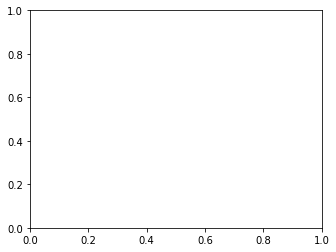

In [10]:
az_co= all_ports["P1"]["AZ T0 CO"]["amplitude"]
az_cr= all_ports["P1"]["AZ T0 CR"]["amplitude"]

az_co = az_co.convert_objects(convert_numeric=True)
az_cr = az_cr.convert_objects(convert_numeric=True)

x1 = np.arange(0, 360, 1) #Angle axis


az_co= all_ports["P1"]["AZ T0 CO"]["amplitude"]
az_cr= all_ports["P1"]["AZ T0 CR"]["amplitude"]




###############################################################
# Plotting Function
###############################################################

fig, ax = plt.subplots()
fig.subplots_adjust(right=.8)

labels = ["a", "b"]
l1 = ax.plot(x1, y1.T, lw=4, alpha=0.1, c='b', label='a')
#l2 = ax.plot(x1, y2.T, lw=4, alpha=0.2, c='r', label='b')

line_collections = [l1,l2]
plugins.connect(fig, plugins.InteractiveLegendPlugin(line_collections, labels))

mpld3.display()



In [29]:
colours=list( ["blue", 
             "green",
             "red",
             "cyan",
             "magenta",
             "yellow",
             "black",
             "white",
             "tan",
             "firebrick",
             "plum" ]           
            )

x1 = np.arange(0, 360, 1)

az_co= all_ports["P1"]["AZ T0 CO"]["amplitude"]
az_cr= all_ports["P1"]["AZ T0 CR"]["amplitude"]

az_co = az_co.convert_objects(convert_numeric=True)
az_cr = az_cr.convert_objects(convert_numeric=True)

az_co,az_cr = normalise2(az_co,az_cr)

key_list=az_co.keys()

fig, ax = plt.subplots()
fig.subplots_adjust(right=.8)

i=1

co = az_co[key_list[i]]  
cr = az_cr[key_list[i]]

y1 = np.array([ co.as_matrix() ,  cr.as_matrix() ])

l1 = ax.plot(x1,
             y1.T, 
             lw=4, 
             alpha=0.1,
             label=key_list[i],
             c=colours[i])


labels = [key_list[i]]

line_collections = [l1]
plugins.connect(fig, plugins.InteractiveLegendPlugin(line_collections, labels))

mpld3.display()


In [31]:
colours=list( ["blue", "green", "red", "cyan", "magenta",
             "yellow", "black", "tan", "firebrick",
             "plum", "aqua", "darkblue", "crimson", "pink",
             "chocolate", "darkgrey", "blue", "green", "red",
             "cyan", "magenta", "yellow", "black", "tan", 
             "firebrick", "plum", "aqua", "darkblue",
             "crimson", "pink", "chocolate", "darkgrey" ]  )

x1 = np.arange(0, 360, 1)

az_co= all_ports["P1"]["AZ T0 CO"]["amplitude"]
az_cr= all_ports["P1"]["AZ T0 CR"]["amplitude"]

az_co = az_co.convert_objects(convert_numeric=True)
az_cr = az_cr.convert_objects(convert_numeric=True)

az_co,az_cr = normalise2(az_co,az_cr)

key_list=list(az_co.keys())

fig, ax = plt.subplots(figsize=(12,7))
fig.subplots_adjust(right=.8)

ln=list()

for i in range(len(key_list)):

    co = az_co[key_list[i]]  
    cr = az_cr[key_list[i]]
    
    y1 = np.array([ co.as_matrix() ,  cr.as_matrix() ])
    
    ln.append(ax.plot(x1,
                 y1.T, 
                 lw=1.6, 
                 alpha=0.9,
                 label=key_list[i],
                 c=colours[i]))


plugins.connect(fig, plugins.InteractiveLegendPlugin(ln, key_list, alpha_unsel=0.05, alpha_over=1.5, start_visible=False))

###########################################################################
# Figure Settings

#Set axis parameters
ax.grid(alpha=0.25)
ax.set_ylim([-40,0.5])
ax.set_xlim([0,360])
x_tick_spacing = 20
y_tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_tick_spacing))
    
#Set Plot title & axis titles
ax.set_ylabel('dBi')
ax.set_xlabel('Angle')

ax.set_ylim([-40,0.5])
ax.set_xlim([0,360])
    
#ax.set_title(fname)
    

mpld3.display()